<a href="https://colab.research.google.com/github/prithsha/erav2/blob/main/ERA_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
# importing required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import logging

# importing modules defined by us
import logginInit # module for init of logging
import utils
import constant


2024-02-24 01:44:43,050	INFO	ERA	<module>	25424	17736	Logger printing Info configuration


CODE BLOCK: 2

In [2]:
# creating logger instance used here
logger = logging.getLogger(constant.APP_NAME).getChild(__name__)
device = utils.get_execution_device()

2024-02-24 01:44:43,560	INFO	ERA.utils	get_execution_device	25424	17736	used device: cuda, device name: Quadro RTX 5000, device count: 1


CODE BLOCK: 3

In [3]:
# Train and test data transformations
train_transforms, test_transforms = utils.get_basic_train_and_test_transform(target_image_size=(28,28))

2024-02-24 01:44:43,576	INFO	ERA.utils	get_basic_train_and_test_transform	25424	17736	created train and test transforms


CODE BLOCK: 4

In [4]:
train_data, test_data = utils.get_train_and_test_dataset(utils.DatasetType.MNIST,
                                              train_transform=train_transforms,
                                              test_transform=test_transforms)



2024-02-24 01:44:43,592	INFO	ERA.utils	get_train_and_test_dataset	25424	17736	Get train and test data set instance.


CODE BLOCK: 5

In [5]:
batch_size = 512

import utils

kwargs = { 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_loader : DataLoader = utils.get_data_loader_instance(data_set=train_data, batch_size=batch_size ,**kwargs)
test_loader: DataLoader = utils.get_data_loader_instance(data_set=test_data,**kwargs)

2024-02-24 01:44:43,673	INFO	ERA.utils	get_data_loader_instance	25424	17736	Creating data loader instance with batch size 512,kwargs: {'shuffle': True, 'num_workers': 4, 'pin_memory': True}
2024-02-24 01:44:43,676	INFO	ERA.utils	get_data_loader_instance	25424	17736	Creating data loader instance with batch size 32,kwargs: {'shuffle': True, 'num_workers': 4, 'pin_memory': True}


CODE BLOCK: 6

2024-02-24 01:44:43,702	INFO	ERA.utils	visualize_images_in_frame	25424	17736	Preparing to show data as grid
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


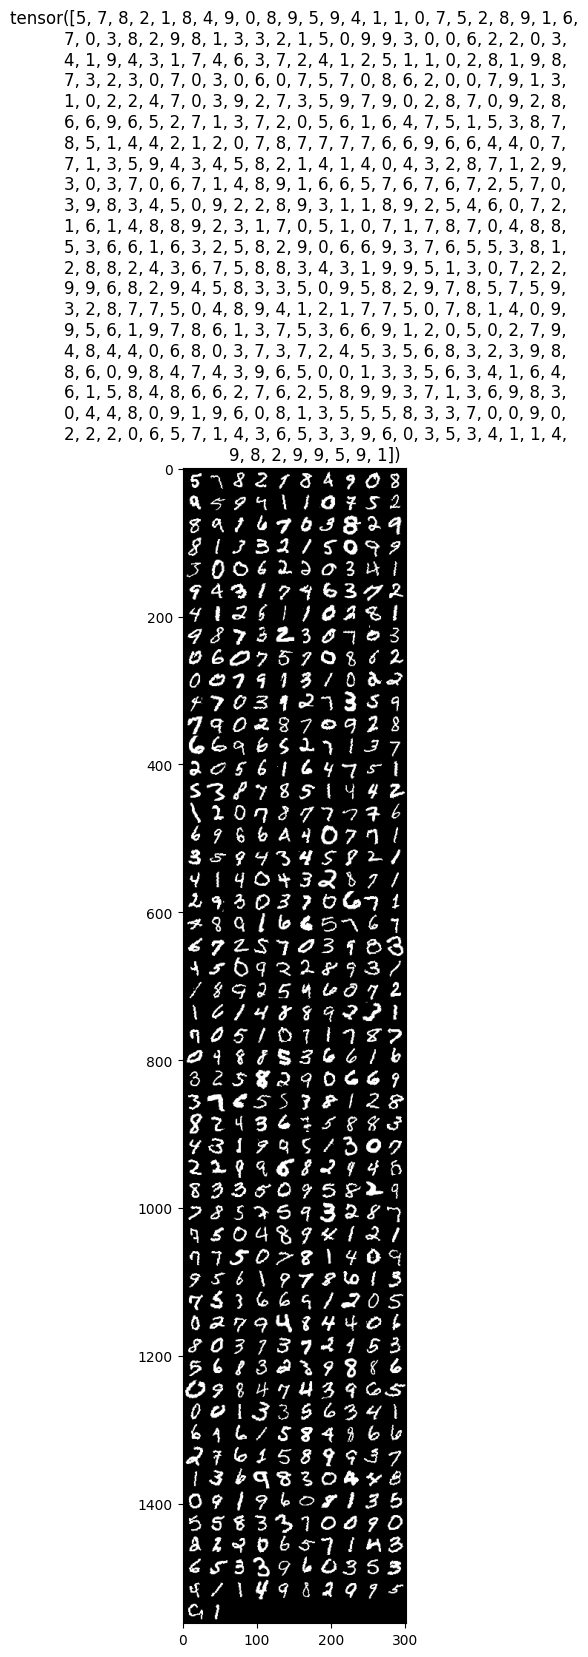

In [6]:
# Visualize the data
utils.visualize_images_in_frame(train_loader)


CODE BLOCK: 7

In [7]:
from model import MySimpleNet
    
utils.get_network_summary(MySimpleNet(),input_size=(1, 28, 28))


2024-02-24 01:44:50,315	INFO	ERA.utils	get_execution_device	25424	17736	used device: cuda, device name: Quadro RTX 5000, device count: 1
2024-02-24 01:44:51,677	INFO	ERA.utils	get_network_summary	25424	17736	None


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses_list = []
training_accuracy_list = []

test_losses_list = []
test_accuracy_list = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:

def train(model, train_loader, optimizer, criterion):
  training_accuracy, training_loss = utils.train_model(model=model, train_loader=train_loader, optimizer=optimizer, loss_criteria=criterion)

  training_accuracy_list.append(training_accuracy)
  train_losses_list.append(training_loss)

def test(model, test_loader, criterion):
  test_accuracy, test_loss = utils.test_model(model=model, test_loader=test_loader, loss_criteria=criterion)

  test_accuracy_list.append(test_accuracy)
  test_losses_list.append(test_loss)


CODE BLOCK: 10

In [10]:
model = MySimpleNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 10

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, train_loader, optimizer, criterion)
  test(model, test_loader, criterion)
  scheduler.step()

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
2024-02-24 01:44:51,729	INFO	ERA.utils	get_execution_device	25424	17736	used device: cuda, device name: Quadro RTX 5000, device count: 1


Epoch 1


2024-02-24 01:44:56,304	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3060, Accuracy=10.16
2024-02-24 01:44:56,465	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3049, Accuracy=10.16
2024-02-24 01:44:56,510	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3049, Accuracy=10.03
2024-02-24 01:44:56,537	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3050, Accuracy=10.25
2024-02-24 01:44:56,566	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3053, Accuracy=9.80
2024-02-24 01:44:56,592	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3006, Accuracy=9.86
2024-02-24 01:44:56,621	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.2969, Accuracy=10.04
2024-02-24 01:44:56,648	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.2941, Accuracy=10.25
2024-02-24 01:44:56,676	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.3043, Accuracy=10.00
2024-02-24 01:44:56,703	INFO	ERA.utils	train_model	25424	17736	Train: Loss=2.2977, Accuracy=10.14
2024-02-24 01:44:56,73

Epoch 2


2024-02-24 01:45:13,071	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2729, Accuracy=92.38
2024-02-24 01:45:13,219	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.3062, Accuracy=90.92
2024-02-24 01:45:13,246	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2381, Accuracy=91.67
2024-02-24 01:45:13,274	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2271, Accuracy=92.09
2024-02-24 01:45:13,301	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2503, Accuracy=92.27
2024-02-24 01:45:13,330	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2428, Accuracy=92.25
2024-02-24 01:45:13,383	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2164, Accuracy=92.33
2024-02-24 01:45:13,411	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2188, Accuracy=92.33
2024-02-24 01:45:13,438	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2572, Accuracy=92.32
2024-02-24 01:45:13,465	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.2751, Accuracy=92.27
2024-02-24 01:45:13,

Epoch 3


2024-02-24 01:45:30,819	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1415, Accuracy=94.92
2024-02-24 01:45:30,931	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1400, Accuracy=95.31
2024-02-24 01:45:30,959	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1337, Accuracy=95.70
2024-02-24 01:45:30,994	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1243, Accuracy=95.70
2024-02-24 01:45:31,025	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1143, Accuracy=95.82
2024-02-24 01:45:31,054	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1735, Accuracy=95.51
2024-02-24 01:45:31,090	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1657, Accuracy=95.40
2024-02-24 01:45:31,192	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0980, Accuracy=95.58
2024-02-24 01:45:31,219	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1190, Accuracy=95.53
2024-02-24 01:45:31,247	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1831, Accuracy=95.37
2024-02-24 01:45:31,

Epoch 4


2024-02-24 01:45:49,309	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0847, Accuracy=97.46
2024-02-24 01:45:49,454	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0969, Accuracy=97.07
2024-02-24 01:45:49,481	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0722, Accuracy=97.33
2024-02-24 01:45:49,508	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1189, Accuracy=96.92
2024-02-24 01:45:49,536	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0838, Accuracy=96.95
2024-02-24 01:45:49,564	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0742, Accuracy=97.10
2024-02-24 01:45:49,592	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0588, Accuracy=97.24
2024-02-24 01:45:49,619	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0711, Accuracy=97.27
2024-02-24 01:45:49,648	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0953, Accuracy=97.33
2024-02-24 01:45:49,676	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1007, Accuracy=97.30
2024-02-24 01:45:49,

Epoch 5


2024-02-24 01:46:07,280	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0917, Accuracy=96.68
2024-02-24 01:46:07,399	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0954, Accuracy=96.68
2024-02-24 01:46:07,426	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0875, Accuracy=97.01
2024-02-24 01:46:07,455	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0685, Accuracy=97.12
2024-02-24 01:46:07,482	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0815, Accuracy=97.19
2024-02-24 01:46:07,510	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0832, Accuracy=97.10
2024-02-24 01:46:07,539	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0629, Accuracy=97.15
2024-02-24 01:46:07,567	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0621, Accuracy=97.29
2024-02-24 01:46:07,594	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0991, Accuracy=97.33
2024-02-24 01:46:07,622	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0922, Accuracy=97.32
2024-02-24 01:46:07,

Epoch 6


2024-02-24 01:46:26,145	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0763, Accuracy=98.05
2024-02-24 01:46:26,295	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0668, Accuracy=97.95
2024-02-24 01:46:26,323	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0679, Accuracy=97.79
2024-02-24 01:46:26,350	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0572, Accuracy=98.00
2024-02-24 01:46:26,379	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0756, Accuracy=97.77
2024-02-24 01:46:26,408	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0532, Accuracy=97.75
2024-02-24 01:46:26,436	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0614, Accuracy=97.82
2024-02-24 01:46:26,463	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0567, Accuracy=97.78
2024-02-24 01:46:26,491	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0682, Accuracy=97.72
2024-02-24 01:46:26,519	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0747, Accuracy=97.71
2024-02-24 01:46:26,

Epoch 7


2024-02-24 01:46:45,100	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0719, Accuracy=97.07
2024-02-24 01:46:45,224	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1004, Accuracy=96.88
2024-02-24 01:46:45,251	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1092, Accuracy=97.20
2024-02-24 01:46:45,279	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0577, Accuracy=97.41
2024-02-24 01:46:45,306	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0461, Accuracy=97.54
2024-02-24 01:46:45,335	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0468, Accuracy=97.72
2024-02-24 01:46:45,364	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0834, Accuracy=97.74
2024-02-24 01:46:45,431	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0697, Accuracy=97.71
2024-02-24 01:46:45,459	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0851, Accuracy=97.70
2024-02-24 01:46:45,487	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0574, Accuracy=97.68
2024-02-24 01:46:45,

Epoch 8


2024-02-24 01:47:03,586	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0342, Accuracy=98.63
2024-02-24 01:47:03,744	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0679, Accuracy=98.73
2024-02-24 01:47:03,770	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0517, Accuracy=98.63
2024-02-24 01:47:03,798	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0409, Accuracy=98.58
2024-02-24 01:47:03,826	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0680, Accuracy=98.40
2024-02-24 01:47:03,854	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0588, Accuracy=98.37
2024-02-24 01:47:03,882	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0384, Accuracy=98.41
2024-02-24 01:47:03,910	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0723, Accuracy=98.32
2024-02-24 01:47:03,938	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0569, Accuracy=98.33
2024-02-24 01:47:03,966	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.1041, Accuracy=98.22
2024-02-24 01:47:04,

Epoch 9


2024-02-24 01:47:22,731	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0574, Accuracy=97.85
2024-02-24 01:47:22,866	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0402, Accuracy=98.34
2024-02-24 01:47:22,892	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0491, Accuracy=98.24
2024-02-24 01:47:22,921	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0407, Accuracy=98.34
2024-02-24 01:47:22,950	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0779, Accuracy=98.05
2024-02-24 01:47:22,979	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0394, Accuracy=98.14
2024-02-24 01:47:23,007	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0694, Accuracy=98.05
2024-02-24 01:47:23,134	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0735, Accuracy=98.00
2024-02-24 01:47:23,162	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0550, Accuracy=98.07
2024-02-24 01:47:23,191	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0454, Accuracy=98.16
2024-02-24 01:47:23,

Epoch 10


2024-02-24 01:47:41,843	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0626, Accuracy=98.05
2024-02-24 01:47:41,995	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0763, Accuracy=98.44
2024-02-24 01:47:42,022	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0584, Accuracy=98.24
2024-02-24 01:47:42,051	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0425, Accuracy=98.29
2024-02-24 01:47:42,079	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0693, Accuracy=98.16
2024-02-24 01:47:42,108	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0294, Accuracy=98.34
2024-02-24 01:47:42,137	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0177, Accuracy=98.55
2024-02-24 01:47:42,166	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0520, Accuracy=98.49
2024-02-24 01:47:42,194	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0573, Accuracy=98.48
2024-02-24 01:47:42,225	INFO	ERA.utils	train_model	25424	17736	Train: Loss=0.0846, Accuracy=98.38
2024-02-24 01:47:42,

CODE BLOCK: 11

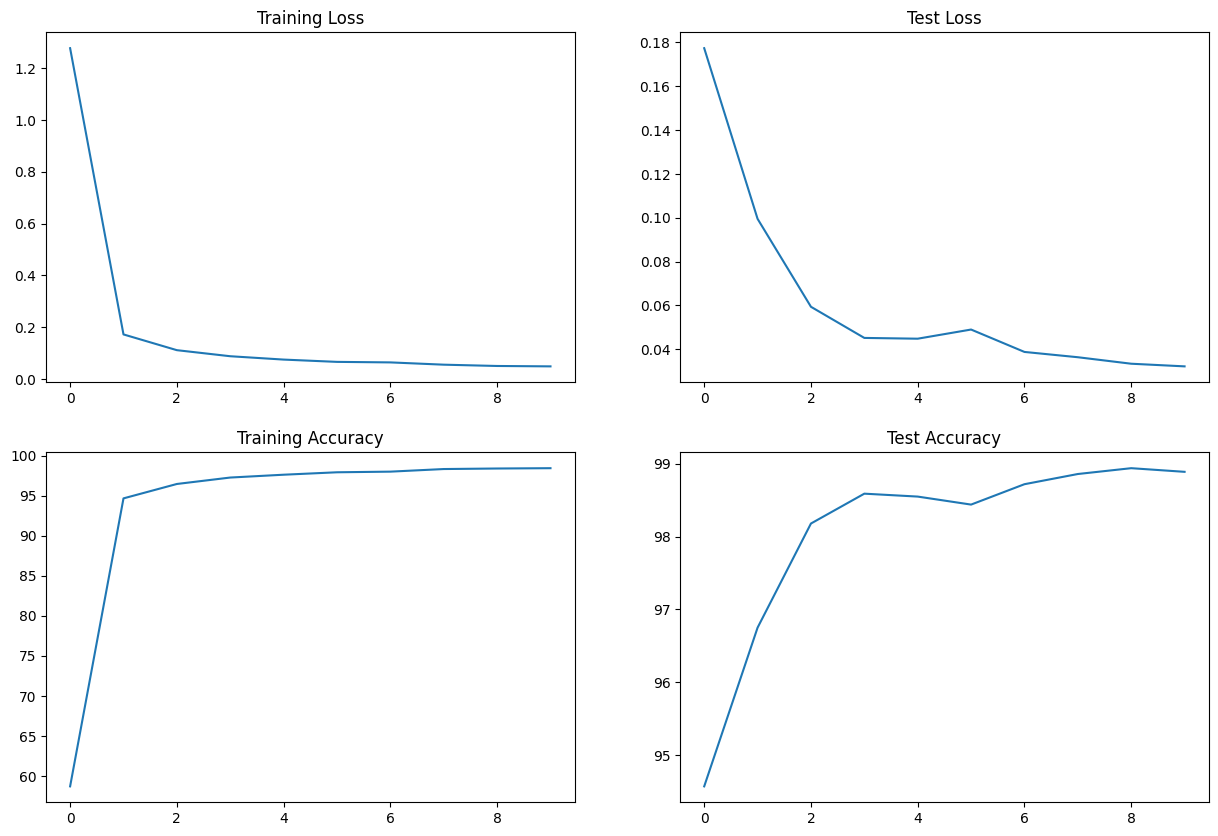

In [11]:
utils.plot_train_accuracy_and_test_accuracy_graph(train_accuracy=training_accuracy_list, train_losses=train_losses_list,
                                                  test_accuracy=test_accuracy_list, test_losses=test_losses_list)